### This jupyter notebook contains contents of the lesson "Bar charts, Histograms and Scatter plot"

**Author : Umidjon Sattorov. Machine Learning engineer**

In [25]:
# Importing necessary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

| Column          | English Description                                                           | Русское описание                                                                  | O'zbekcha tavsifi                                                         |
| --------------- | ----------------------------------------------------------------------------- | --------------------------------------------------------------------------------- | ------------------------------------------------------------------------- |
| **age**         | Age of the patient in days.                                                   | Возраст пациента в днях.                                                          | Bemor yoshi (kunlarda).                                                   |
| **sex**         | Gender: `1` = Male, `2` = Female.                                             | Пол: `1` = Мужчина, `2` = Женщина.                                                | Jinsi: `1` = Erkak, `2` = Ayol.                                           |
| **height**      | Height in centimeters.                                                        | Рост в сантиметрах.                                                               | Boʻy (sm da).                                                             |
| **weight**      | Weight in kilograms.                                                          | Вес в килограммах.                                                                | Vazn (kg da).                                                             |
| **ap\_hi**      | Systolic blood pressure.                                                      | Систолическое давление.                                                           | Yuqori qon bosimi (sistolik).                                             |
| **ap\_lo**      | Diastolic blood pressure.                                                     | Диастолическое давление.                                                          | Pastki qon bosimi (diastolik).                                            |
| **cholesterol** | Cholesterol level: `1` = Normal, `2` = Above normal, `3` = Well above normal. | Уровень холестерина: `1` = Нормальный, `2` = Повышенный, `3` = Сильно повышенный. | Xolesterin darajasi: `1` = Normal, `2` = Biroz yuqori, `3` = Juda yuqori. |
| **gluc**        | Glucose level: same coding as cholesterol.                                    | Уровень глюкозы: те же значения, что и для холестерина.                           | Glyukoza darajasi: `1`, `2`, `3` — xuddi xolesterin kabi.                 |
| **smoke**       | Smokes: `0` = No, `1` = Yes.                                                  | Курит: `0` = Нет, `1` = Да.                                                       | Chekadimi: `0` = Yoʻq, `1` = Ha.                                          |
| **alco**        | Alcohol intake: `0` = No, `1` = Yes.                                          | Употребляет алкоголь: `0` = Нет, `1` = Да.                                        | Spirtli ichimlik ichadimi: `0` = Yoʻq, `1` = Ha.                          |
| **active**      | Physically active: `0` = No, `1` = Yes.                                       | Физически активен: `0` = Нет, `1` = Да.                                           | Jismoniy faolmi: `0` = Yoʻq, `1` = Ha.                                    |
| **cardio**      | Has cardiovascular disease: `0` = No, `1` = Yes.                              | Есть сердечно-сосудистое заболевание: `0` = Нет, `1` = Да.                        | Yurak-qon tomir kasalligi mavjudmi: `0` = Yoʻq, `1` = Ha.                 |


In [26]:
# Reading dataset using pandas
df = pd.read_csv("./medical_examination.csv")
df.set_index("id", inplace = True)
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**Basic analysis**

In [27]:
df.shape

(70000, 12)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   sex          70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [29]:
df.columns

Index(['age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

**Histograms for data distrbutions**

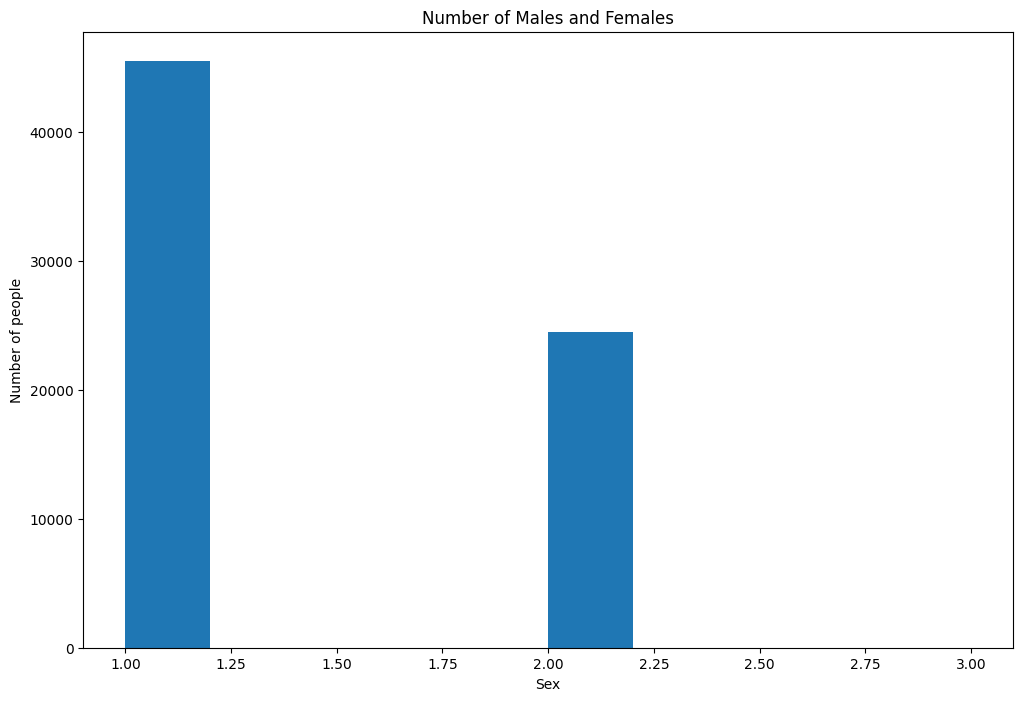

In [30]:
# Histogram for data distribution
plt.figure(figsize = (12, 8))
plt.title(label = 'Number of Males and Females')
plt.hist(df['sex'])
plt.ylabel(ylabel = "Number of people")
plt.xlabel(xlabel = "Sex")
plt.show()

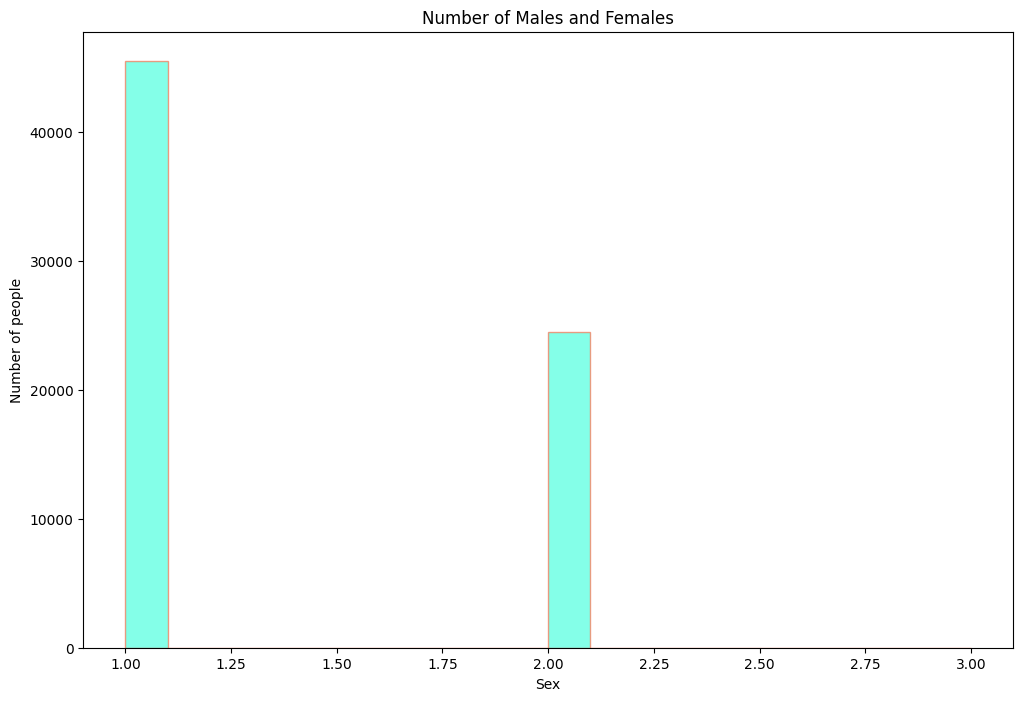

In [31]:
# Histogram for data distribution
plt.figure(figsize = (12, 8))
plt.title(label = 'Number of Males and Females')
plt.hist(df['sex'], bins = 20, alpha = 0.6, color = '#33ffda', edgecolor = '#ff5b33', histtype = 'bar')
plt.ylabel(ylabel = "Number of people")
plt.xlabel(xlabel = "Sex")
plt.show()

In [32]:
df['sex'].value_counts()

sex
1    45522
2    24467
3       11
Name: count, dtype: int64

**Task :**

1) Show the distribution of the weight data using histograms in matplotlib

2) Represent the distribution of the age data using histograms in matplotlib

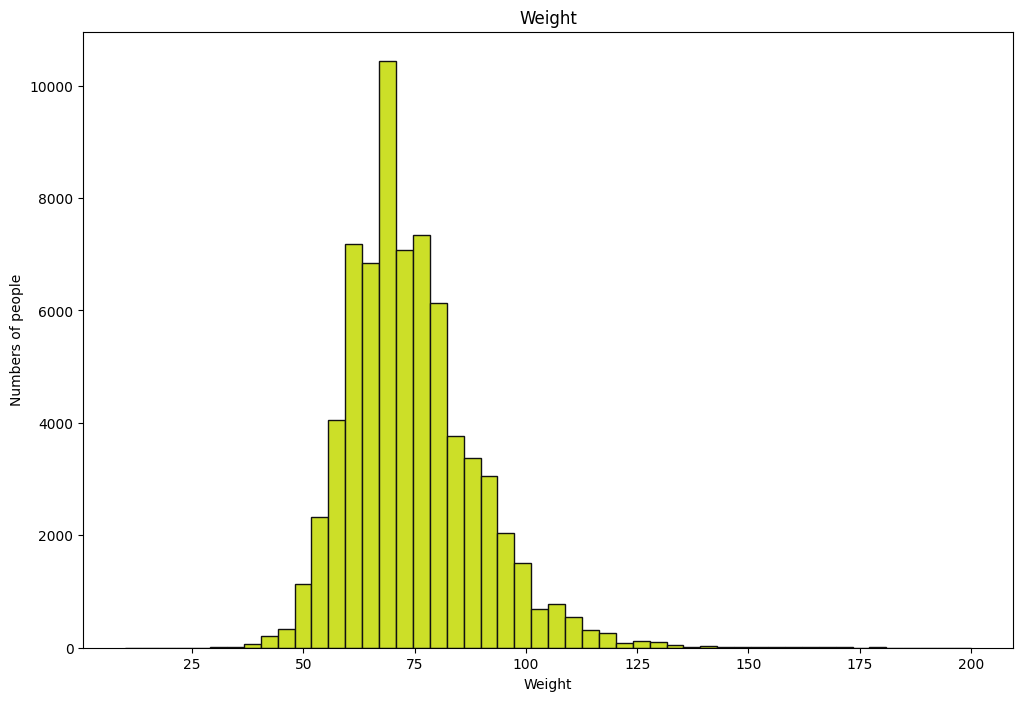

In [33]:
# Your code goes here
plt.figure(figsize = (12, 8))
plt.title('Weight')
plt.hist(df['weight'], bins = 50, color = "#CCDF28", edgecolor = "#111111")
plt.xlabel('Weight')
plt.ylabel('Numbers of people')
plt.show()

**Bar charts**

**Task**

Visually represent if males or females are proactive compared to each other

In [34]:
active_percent = df.groupby('sex')['active'].mean() * 100
active_percent.apply(lambda x : f'{x:.2f}%')

sex
1    80.20%
2    80.69%
3    90.91%
Name: active, dtype: object

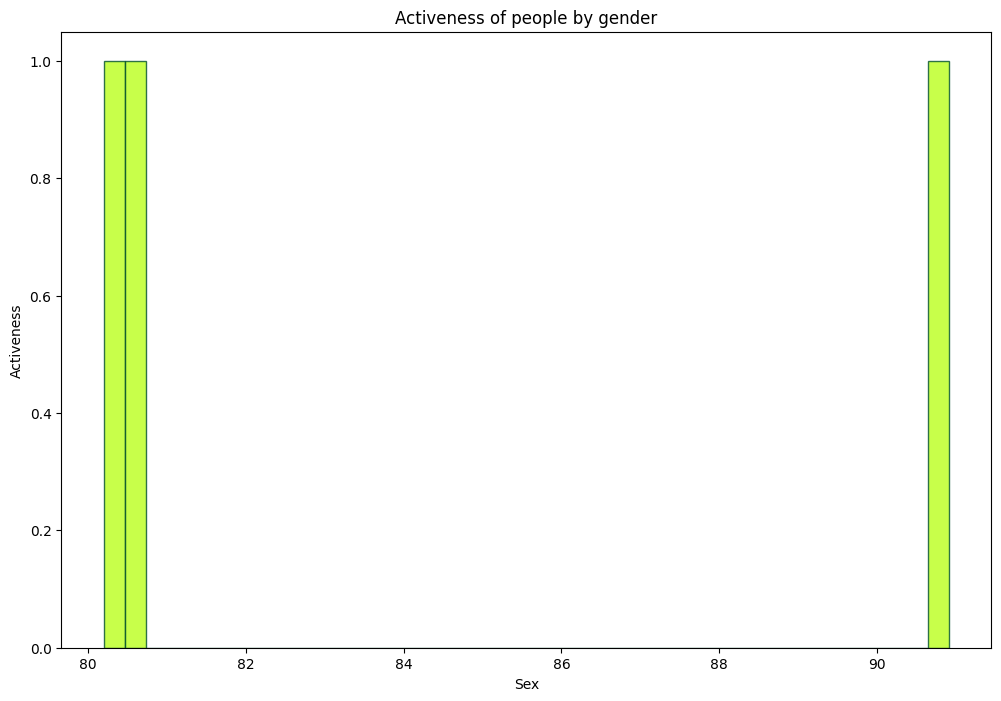

In [35]:
plt.figure(figsize = (12, 8))
plt.title(label = 'Activeness of people by gender')
plt.hist(active_percent, bins = 40, alpha = 0.8, color = "#bbff1d63", edgecolor = "#004f2e", histtype = 'bar')
plt.ylabel(ylabel = "Activeness")
plt.xlabel(xlabel = "Sex")
plt.show()

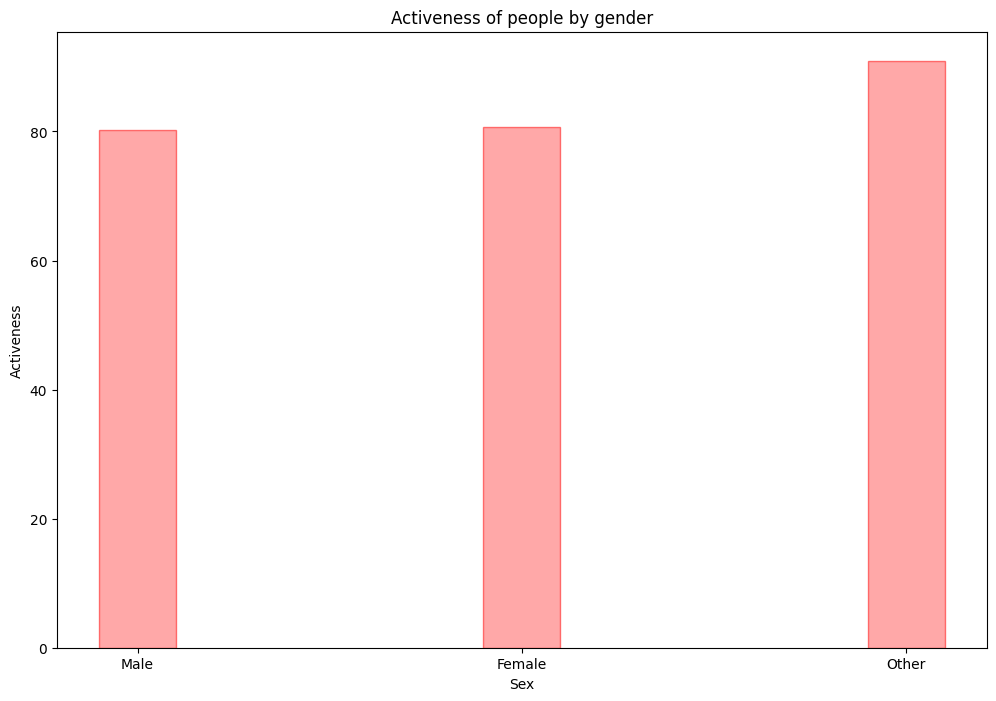

In [36]:
# Bar charts
x_labels = ['Male' if x == 1 else 'Female' if x == 2 else 'Other' for x in active_percent.index]

plt.figure(figsize = (12, 8))
plt.title(label = 'Activeness of people by gender')
plt.bar(x = x_labels, height = active_percent.values, alpha = 0.5, width = 0.2, color = "#ff535362", edgecolor = "#ff0000")
plt.ylabel(ylabel = "Activeness")
plt.xlabel(xlabel = "Sex")
plt.show()

**Tasks**

    Visually check following hyphothesis : 

1) Check the following hyphothesis : The people with more weight would smoke more compared to the people with less weight

2) Check the following hyphothesis : Obese people have highler level of cholestrol compared to people with less weight

3) Check the following hyphothesis : Active people struggle less with cardio problems compared to people with sedentary lifestyle

4) Check the following hyphothesis : Blood pressure have connection with the age of the people

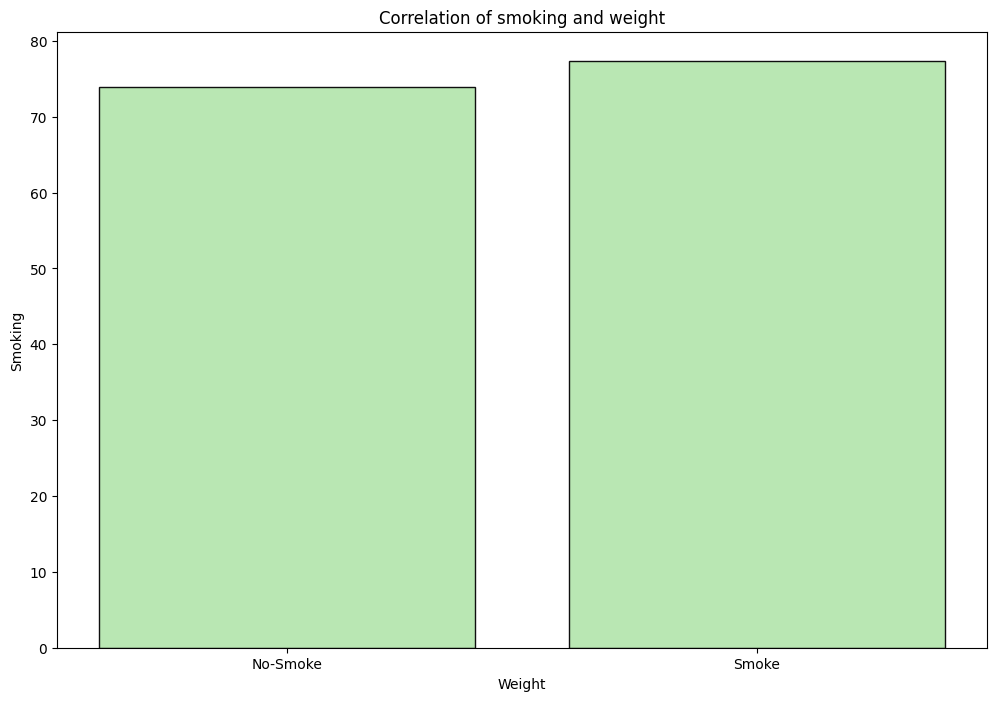

In [37]:
# Your code goes here
smk = df.groupby(by = 'smoke')['weight'].mean()
x_label = ['Smoke' if x == 1 else 'No-Smoke' for x in smk.index]

plt.figure(figsize = (12, 8))
plt.title(label = 'Correlation of smoking and weight')
plt.bar(x_label, smk.values, color = "#49c23961", edgecolor = "#0f0f0f")
plt.xlabel(xlabel = "Weight")
plt.ylabel(ylabel = "Smoking")
plt.show()

In [38]:
df.groupby(by = 'cholesterol')['weight'].mean()

cholesterol
1    73.053862
2    76.666464
3    78.773085
Name: weight, dtype: float64

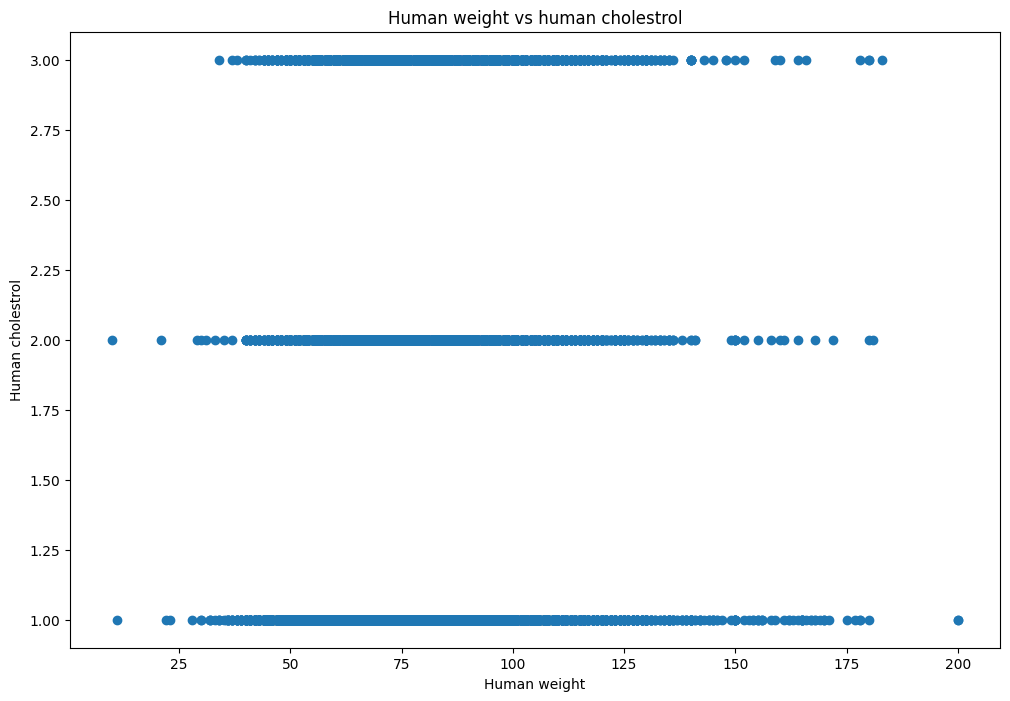

In [39]:
# Your code goes here
df = df.sort_values(by = 'weight')
plt.figure(figsize = (12, 8))
plt.title(label = 'Human weight vs human cholestrol')
plt.scatter(x = df['weight'], y = df['cholesterol'])
plt.ylabel(ylabel = "Human cholestrol")
plt.xlabel(xlabel = "Human weight")
plt.show()

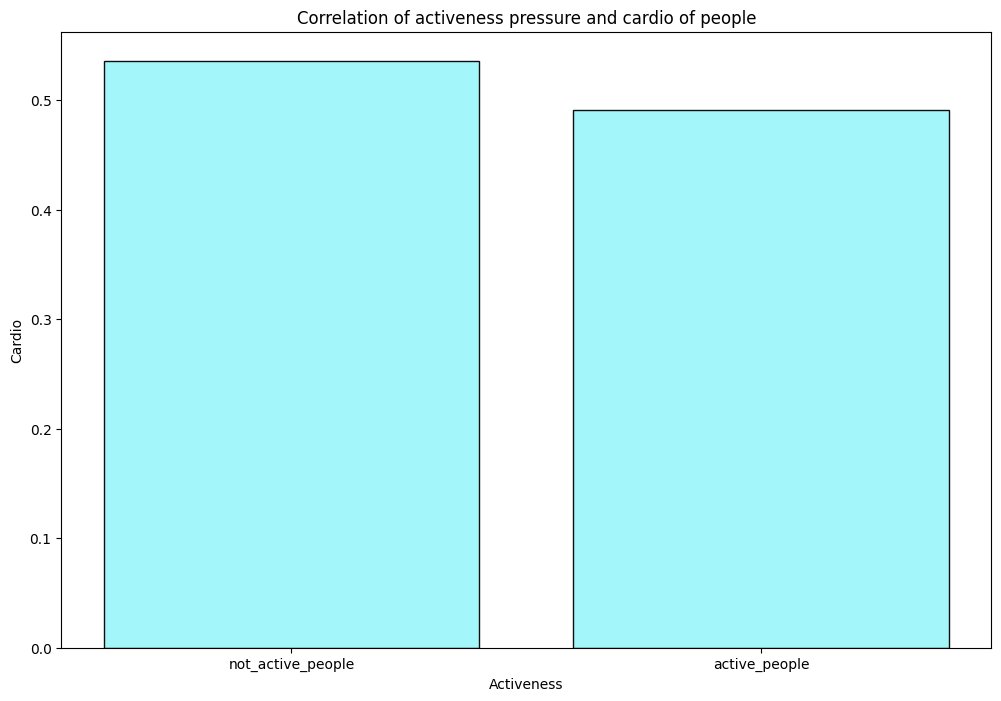

In [57]:
activeness = df.groupby(by = 'active')['cardio'].mean()
x_lab = ['active_people' if x == 1 else 'not_active_people' for x in activeness.index]

plt.figure(figsize = (12, 8))
plt.title(label = 'Correlation of activeness pressure and cardio of people')
plt.bar(x_lab, activeness.values, color = "#08e8f05f", edgecolor = "#0f0f0f")
plt.xlabel(xlabel = "Activeness")
plt.ylabel(ylabel = "Cardio")
plt.show()

In [ ]:
# Your code goes here
activeness = df['active'].mean()
active_people = df['active'] > activeness
not_active_people = df['active'] < activeness

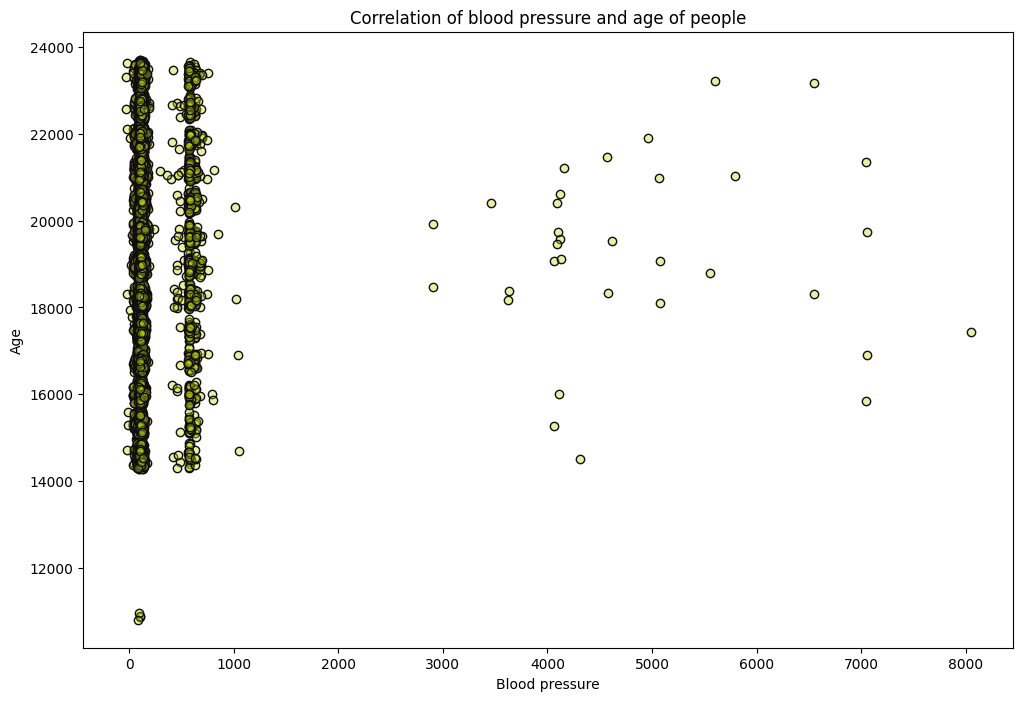

In [46]:
# Your code goes here
blood_pressure = (df['ap_hi'] + df['ap_lo']) / 2

plt.figure(figsize = (12, 8))
plt.title(label = 'Correlation of blood pressure and age of people')
plt.scatter(blood_pressure, df['age'], color = "#c3d6145f", edgecolor = "#0f0f0f")
plt.xlabel(xlabel = "Blood pressure")
plt.ylabel(ylabel = "Age")
plt.show()

**Scatter plots**

**Correlation**

**Task :**

1) Check if human weight has correlation with human height from the dataset

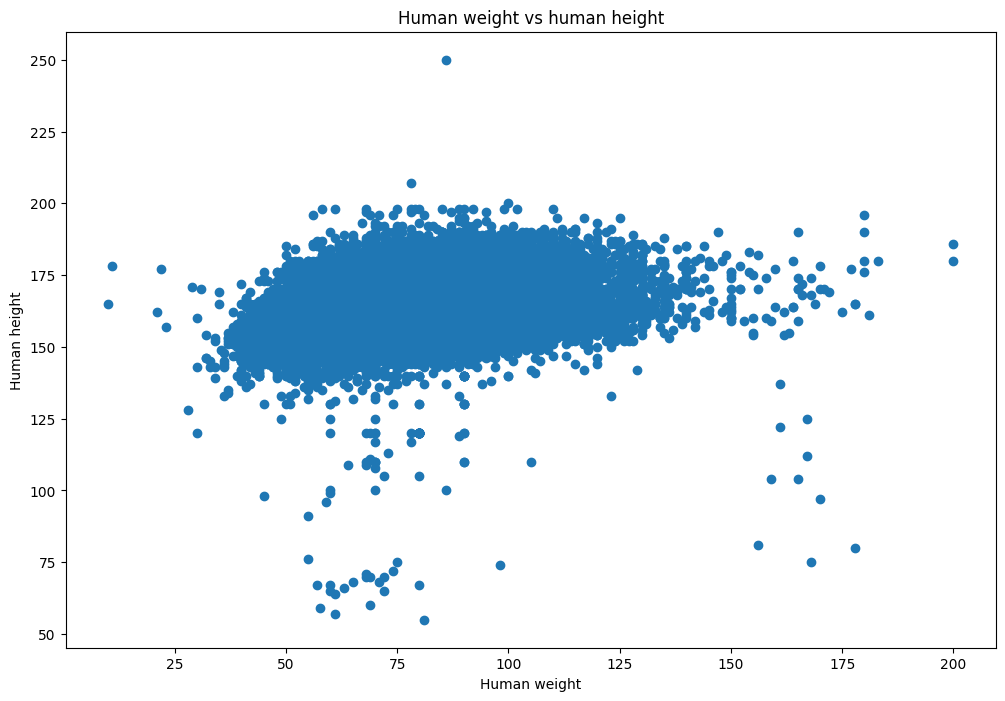

In [ ]:
# Scatter plots

plt.figure(figsize = (12, 8))
plt.title(label = 'Human weight vs human height')
plt.scatter(x = df['weight'], y = df['height'])
plt.ylabel(ylabel = "Human height")
plt.xlabel(xlabel = "Human weight")
plt.show()

2) Check if blood pressure has correlation with human height

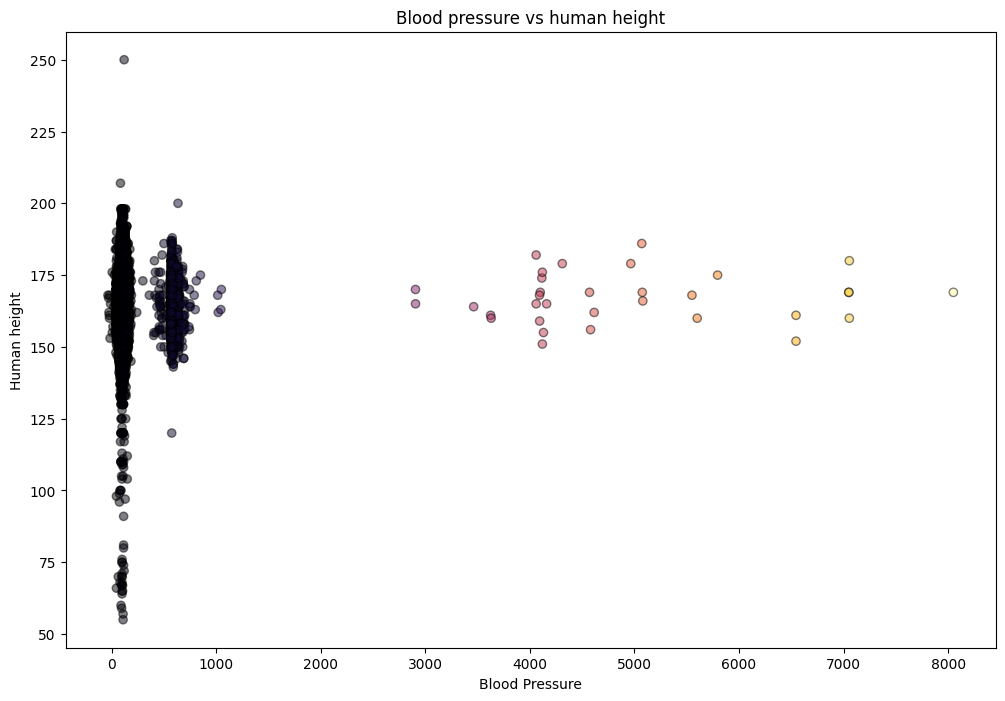

In [ ]:
# Scatter plots
mean_pressure = (df['ap_hi'] + df['ap_lo']) / 2
colors = np.random.rand(len(df))

plt.figure(figsize = (12, 8))
plt.title(label = 'Blood pressure vs human height')
plt.scatter(x = mean_pressure, y = df['height'], c = mean_pressure, alpha=0.5, cmap='inferno', edgecolors = 'k')
plt.ylabel(ylabel = "Human height")
plt.xlabel(xlabel = "Blood Pressure")
plt.show()

In [ ]:
# All available colormaps in matplotlib
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't

From scatter plots, now only we can see the correlation between datasets, but also outliers might be visible from the visualization alone.

**CHATGPT :**

🔴 So, what’s the max ever recorded?
There is no official global record, but in rare and extreme medical cases, systolic values of up to 300 mmHg and diastolic values around 200 mmHg have been reported in hypertensive emergencies.

But these are extremely dangerous and usually life-threatening. Such cases require immediate ICU treatment. The body isn’t built to handle this long-term.

___

**Tasks**

1) 